# <span style="color:darkblue"> Lecture 18: Neural Networks and Tensor Flow </span>

<font size = "5">

In this class we will talk about how to set up <br>
a neural network classifier using Tensor Flow

For an introduction

https://www.youtube.com/watch?v=i8NETqtGHms

# <span style="color:darkblue"> I. Setup Working Environment </span>



<font size = "5">

We will be using a new library called "Tensor Flow" that is used <br>
to create neural network architectures

In Windows (Anaconda Prompt) or Mac (Terminal) type:

``` conda install tensorflow ```

In [1]:
# Import the package for the University of California Irvine API
from ucimlrepo import fetch_ucirepo 

# Import SK-Learn library for machine learning functions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.metrics import get_scorer_names


# Import standard data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

Import tensor flow packages

In [2]:


# Import standard data analysis packages
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

# <span style="color:darkblue"> II. Data </span>

<font size = "5">

Online Shoppers Purchasing Intention Dataset (OSHPID)

- This dataset contains information about user sessions
- It contains features data about user behavior 
while <br> navigating website
- The goal is to predict whether the customer will purchase or not

https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset


In [9]:
# Fetch online data from the UC Irvine Machine Learning Repository API
online_shopping= fetch_ucirepo(id=468) 

# Extract
X = online_shopping.data.features
# Drop columns that contain non-numeric values
X = X.drop(columns = ["Month","VisitorType"])

# Extract label data
y = online_shopping.data.targets["Revenue"]


In [10]:
# Convert to float types (avoids issues down the line)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

<font size = "5">

Pre-process data prior to running model

In [11]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

In [70]:
# The first step is to produce a "scaler" function
scaler_train = preprocessing.StandardScaler().fit(X_train)
scaler_test  = preprocessing.StandardScaler().fit(X_test)

# Apply scaler function
X_train_scale = scaler_train.transform(X_train)
X_test_scale  = scaler_test.fit(X_test).transform(X_test)

# <span style="color:darkblue"> III. Training a neural network </span>


<font size = "5">

Define number of features in $X$

In [12]:
k_features = X.shape[1]

<font size = "5">

To define a neural network we start with a configuration setup

- We start with an empty canvas with "Keras"
- Then we successively add how many layers we want <br>
and what type

For more information about Keras layers:

https://www.educative.io/answers/what-are-keras-layers

In [13]:
# "basic_model" for now only starts with a configuration

basic_model = keras.models.Sequential()

In [16]:
# We add how many layers we want, starting with the input layer and 
# ending with the output layer
tf.keras.utils.set_random_seed(0)
# This has a dense layer for inputs with "k" features
basic_model.add(Dense(units=16, activation='relu', input_shape=(k_features,)))

basic_model.add(Dense(128, activation='relu'))

# This is the output layer. The sigmoid defines predictions in (0,1)
# We choose 1 unit since there is a scalar output (binary classification)

basic_model.add(Dense(units = 1, activation='sigmoid'))

# Note: If you are using the neural network to predict continuous outcomes,
# you may want a different activation function in the output layer

<font size = "5">

Define an optimizer

In [18]:
# Adam is a type of optimization algorithm

adam = keras.optimizers.legacy.Adam(learning_rate=0.001)

In [19]:
# Define the loss function to optimize

basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

<font size = "5">

Estimate model

- The optimization algorithm proceeds sequentially, through epocs

In [20]:
basic_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


2024-04-05 17:59:42.949896: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


147/289 [==============>...............] - ETA: 0s - loss: 0.4720 - accuracy: 0.8412

289/289 [==============================] - 0s 682us/step - loss: 0.4507 - accuracy: 0.8441
Epoch 2/100
289/289 [==============================] - 0s 608us/step - loss: 0.4293 - accuracy: 0.8465
Epoch 3/100
289/289 [==============================] - 0s 605us/step - loss: 0.4294 - accuracy: 0.8465
Epoch 4/100
289/289 [==============================] - 0s 609us/step - loss: 0.4294 - accuracy: 0.8465
Epoch 5/100
289/289 [==============================] - 0s 720us/step - loss: 0.4289 - accuracy: 0.8465
Epoch 6/100
289/289 [==============================] - 0s 621us/step - loss: 0.4287 - accuracy: 0.8465
Epoch 7/100
289/289 [==============================] - 0s 627us/step - loss: 0.4293 - accuracy: 0.8465
Epoch 8/100
289/289 [==============================] - 0s 638us/step - loss: 0.4291 - accuracy: 0.8465
Epoch 9/100
289/289 [==============================] - 0s 613us/step - loss: 0.4295 - accuracy: 0.8465
Epoch 10/100
289/289 [==============================] - 0s 612us/step - loss: 0.4292 

# <span style="color:darkblue"> IV. Evaluate a neural network </span>


<font size = "5">

Obtain predicted probabilities and convert them to {0,1}

In [21]:
# Convert to array
predicted_prob = basic_model.predict(X_test)
predicted_prob = tf.squeeze(predicted_prob)

# Convert to {0,1} predictions using a 0.5 threshold
threshold = 0.5
predicted = np.array([1 if x >= threshold else 0 for x in predicted_prob])

97/97 [==============================] - 0s 384us/step


<font size = "5">

Obtain confusion matrix

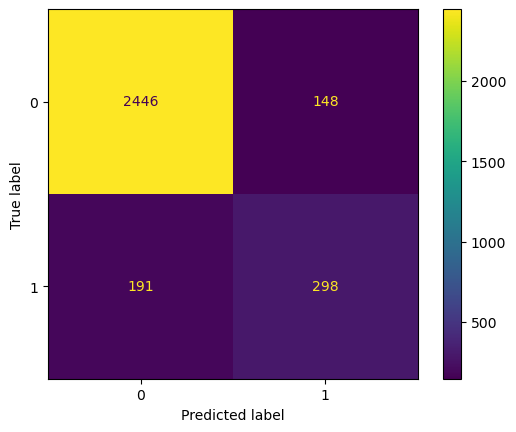

In [82]:
# Obtain confusion matrix
cm = confusion_matrix(y_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<font size = "5">

At the moment we defined a very simple neural network <br>
with just an input layer and an output layer. <br>

Try it yourself!

- Increase the number of units in the input layer
- Does prediction accuracy improve?


In [80]:
# Write your own code




<font size = "5">


Try it yourself!

- Add one or more hidden layers
- Does prediction accuracy improve?

In [ ]:
# Write your own code






<font size = "5">

Try it yourself!

- Import the Mashable dataset that we used earlier <br>
(you can find this in this in the ```ArticlesTrain.csv``` and <br>
```ArticlesTest.csv``` files in the ```data_raw``` folder)

- Try to set up a neural network with a simple input-output layer 

In [ ]:
# Write your own code

ArticlesTe



# <span style="color:darkblue"> V. Additional resources </span>

<font size = "5">

Quick guide:

https://www.tensorflow.org/tutorials/quickstart/beginner

Binary classification:

https://www.freecodecamp.org/news/binary-classification-made-simple-with-tensorflow/

Image classification:

https://www.tensorflow.org/tutorials/images/classification

